### Data Exploration Oluwaseyifunmi and Aminat
\- Open the Titanic passenger list (dataset) in Python.    
\- Show the first few passengers (rows) so everyone knows what’s inside.    
\- Check if any passenger info is missing (e.g., age, ticket price).    
\- Draw pictures (visualizations) to show how things like age or ticket class relate to survival.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
titanic=sns.load_dataset("titanic")

In [18]:
# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')
# Display the first few rows
print(titanic.head())
# Basic information about the dataset
print("\nDataset Info:")
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived

In [19]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [20]:
# Load the data
train_df = sns.load_dataset('titanic')
test_df = sns.load_dataset('titanic')

# Initial exploration
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nTrain Data Columns:", train_df.columns.tolist())
print("\nTrain Data Info:")
print(train_df.info())
print("\nTrain Data Description:")
print(train_df.describe(include='all'))
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())

Train Data Shape: (891, 15)
Test Data Shape: (891, 15)

Train Data Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive

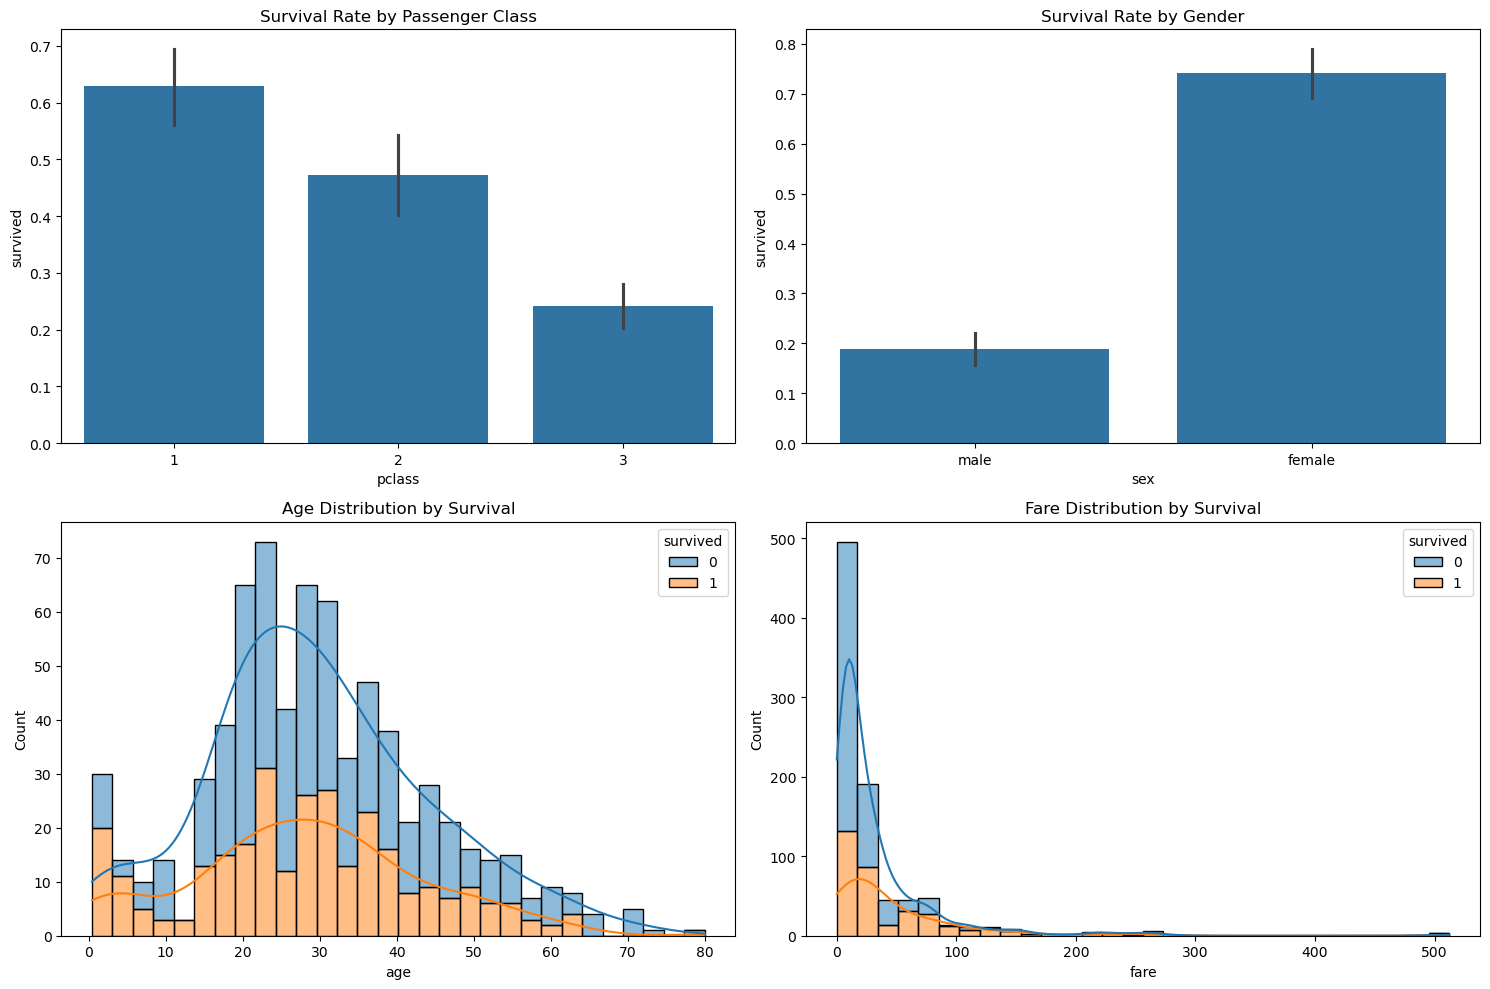

In [21]:
# Visualization of Survival rate by different features
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(x='pclass', y='survived', data=train_df)
plt.title('Survival Rate by Passenger Class')

plt.subplot(2, 2, 2)
sns.barplot(x='sex', y='survived', data=train_df)
plt.title('Survival Rate by Gender')

plt.subplot(2, 2, 3)
sns.histplot(data=train_df, x='age', hue='survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')

plt.subplot(2, 2, 4)
sns.histplot(data=train_df, x='fare', hue='survived', bins=30, kde=True, multiple='stack')
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

### Data Cleaning by Fidelix and Ibraheem    
\- Fix missing passenger ages by guessing (imputing) the average age.    
\- Fill in missing embarkation ports (e.g., use the most common port).    
\- Look for weird numbers (outliers) in ticket prices using boxplots and decide what to do.  

In [22]:
titanic = titanic.assign(
    Age=titanic['age'].fillna(titanic['age'].median()),
    Embarked=titanic['embarked'].fillna(titanic['embarked'].mode()[0])
)

In [23]:
# Outlier detection + removal (chained assignment)
fare_q3 = titanic['fare'].quantile(0.75)
fare_iqr = fare_q3 - titanic['fare'].quantile(0.25)
fare_cap = fare_q3 + 1.5 * fare_iqr  # Tukey's method


In [24]:
titanic = titanic[titanic['fare'] <= fare_cap]


[Text(0.5, 1.0, 'Fare Distribution After\xa0Capping')]

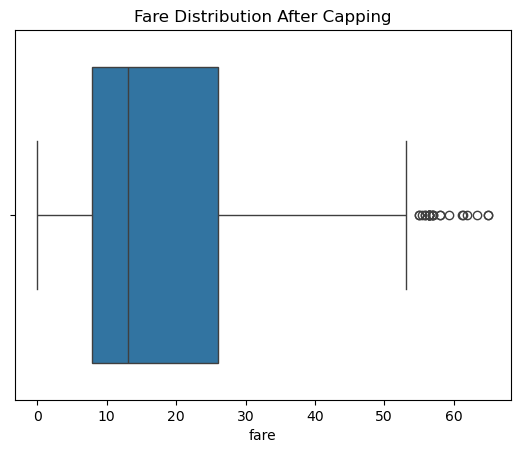

In [25]:
sns.boxplot(x=titanic['fare']).set(title='Fare Distribution After Capping')


### Feature Engineering by Kaothara and Yetunde
\- Create a Family Size feature by adding siblings (SibSp) and parents (Parch).    
\- Group ages into buckets like "kids," "teens," "adults," and "seniors."    
\- Group ticket prices into "cheap," "medium," and "expensive."  

### Data Transformation by Toluwalope and Ibraheem
\- Turn words (categories) like "male/female" or "embarkation port" into numbers (encoding).    
\- Scale numbers like age, fare, and family size so they’re fair for the model.  

### Model training by All the team members
\- Split passengers into a training group (70%) and a test group (30%).    
\- Teach the computer (train a model) to guess survival using Logistic Regression.    
\- Check if the computer is good at guessing (accuracy, confusion matrix).  

### Short Report